# Phase 1 Project

 ### Overview



The Business Problem
XYZ Company is looking to diversify its portfolio and is interested in purchasing aircrafts for commercial and private enterprises. Only that, being complete beginners in the industry, the company knows nothing about this business venture. My task is to identify which aircrafts present the lowest risk for the company to purchase and begin the venture.

The problem statement
1. Design and Technology
* What aircraft makes offer the best return on safety for commercial and private operators?

2. Operational Efficiency and Risk Management
* How can XYZ company minimize risks associated with aircraft accidents? Can purchasing aircrafts with more engines or operating only on *good* weather reduce accident risks?


3. 





Questions

 Which make has the highest reliability rate? Based on:
- Are not completely destroyed in the event an accident occurs.
- Have the lowest fatality rates.
- Which factors seem to be influencing accident rates? Is it scheduling vs unscheduling of flights? Weather conditions, or number of engines?
- In which phases of flight are more accident-prone?

 ### Data Understanding

The dataset, titled **"Aviation_Data"**, contains historical records of aircraft accidents, including details such as the date, location, aircraft make,aircraft model, purpose of flight, total casualties (fatal,serious,minor and uninjured) among other information. The data spans across multiple decades and provides valuable insights into aviation safety patterns across different aircraft and flight types.

This dataset will be used to explore trends in aviation accidents and identify factors associated with higher or lower accident severity, with the goal of improving business decisions.

Without further a do, let's dive into the data and answer these questions.

### Importing libraries and accessing the data

In [48]:
#importing the panda libraries i believe will be useful in reading the data and sifting through the data i'll need 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data\Aviation_Data.csv")

<ipython-input-48-e3d0b64fc2b5>:6: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data\Aviation_Data.csv")


## Data Exploring & Analyis

In [49]:
#Understanding the shape, column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [50]:
#let's now look at the summary distribution of the data
df.describe(include="all")

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,90348,88889,88889,88837,88663,34382,34373,50249,52790,...,82697,16648,77488.000000,76379.000000,76956.000000,82977.000000,84397,61724,82508,73659
unique,87951,71,88863,14782,27758,219,25592,27156,10375,24871,...,26,13590,NaN,NaN,NaN,NaN,4,12,17007,2923
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,49448,258,NaN,NaN,NaN,NaN,77303,15428,61754,16317
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.485960,1.544084,2.235625,27.913634,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN


In [51]:
# i understand from the data structure that there are 31 columns; 26 having string data types and only 5 with float datatype
# The rows are 90348 in total. Let's start by dropping duplicate entries first to cut down on the number of rows.
df.duplicated().sum()


1390

In [52]:
#ok. proceeding to drop these 1390 duplicate entries
Cleaned_df = df.drop_duplicates()
Cleaned_df.shape

(88958, 31)

In [53]:
#let's confirm that the duplicate values have been dropped.
Cleaned_df.duplicated().sum()

0

In [54]:
#For purposes of que i need answered,i'm loading just the col i believe will be necessary moving forward
Relevant_columns = ["Event.Date",
                    "Investigation.Type",
                    "Country",
                    "Aircraft.damage",
                    "Aircraft.Category",
                    "Make",
                    "Model",
                    "Amateur.Built",
                    "Number.of.Engines",
                    "Engine.Type",
                    "Schedule",
                    "Purpose.of.flight",
                    "Total.Fatal.Injuries",
                    "Total.Serious.Injuries",
                    "Total.Minor.Injuries",
                    "Total.Uninjured",
                    "Weather.Condition",
                    "Broad.phase.of.flight"] 

In [55]:
#selecting the relevant columns to use to answer the problem statements
df2 = Cleaned_df[Relevant_columns]
df2

,Event.Date,Investigation.Type,Country,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,1948-10-24,Accident,United States,Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,1962-07-19,Accident,United States,Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,1974-08-30,Accident,United States,Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,1977-06-19,Accident,United States,Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,1979-08-02,Accident,United States,Destroyed,NaN,Cessna,501,No,NaN,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,2022-12-26,Accident,United States,NaN,NaN,PIPER,PA-28-151,No,NaN,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN
90344,2022-12-26,Accident,United States,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
90345,2022-12-26,Accident,United States,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
90346,2022-12-26,Accident,United States,NaN,NaN,CESSNA,210N,No,NaN,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN


In [56]:
#Good! Let's now look at the missing values in each column in order to decide what to do with them.

df2.isna().sum()

Event.Date                   69
Investigation.Type            0
Country                     295
Aircraft.damage            3263
Aircraft.Category         56671
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
Schedule                  76376
Purpose.of.flight          6261
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
dtype: int64

### Handling missing values

For numerical columns (the ones listed below), i decided to use the median to fill in missing values
- Number.of.Engines
- Total.Fatal.Injuries
- Total.Serious.Injuries
- Total.Minor.Injuries
- Total.Uninjured 


In [57]:
#replace missing values in float columns with the median values using positional indexing of columns

df2.iloc[:,12:16] = df2.iloc[:,12:16].fillna(df2.iloc[:,12:16].median()) 
#Also fill the 'Number of engines' empty values with the most recurring number
df2.iloc[:,8] = df2.iloc[:,8].fillna(df2.iloc[:,8].median())

<ipython-input-57-a2e0c85d581e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.iloc[:,12:16] = df2.iloc[:,12:16].fillna(df2.iloc[:,12:16].median())
<ipython-input-57-a2e0c85d581e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.iloc[:,8] = df2.iloc[:,8].fillna(df2.iloc[:,8].median())


As for contecxtual data, i went with using the placeholder 'Unknown' for the following columns:
- Aircraft.damage
- Make
- Model
- Amateur.Built
- Engine.Type
- Purpose.of.flight
- Broad.phase.of.flight
As for the remain contextual data, use placeholder 'UNK' to fill in missing values
- Schedule
- Weather.Condition

Lastly use forward fill method to fill in the blanks on column 'Aircraft Category' seeing as it has too many NaN values to be dropped or left as unknown. This is also applied on column 'Country' and 'Event.Date'.

In [58]:
#1st use 'Unknown' where applicable
Fillunknown_columns = ["Aircraft.damage","Make","Model","Amateur.Built","Engine.Type","Purpose.of.flight","Broad.phase.of.flight"]
df2[Fillunknown_columns] = df2[Fillunknown_columns].fillna(value='Unknown')
#2nd use 'UNK' 
FillUNK_columns = ["Schedule","Weather.Condition"]
df2[FillUNK_columns] = df2[FillUNK_columns].fillna(value = 'UNK')
#df2[FillUNK_columns].applymap(lambda x: 'UNK' if x == 'Unk' else x)
#3rd use 'ffil'
Fillffil_columns = ["Country","Aircraft.Category","Event.Date"]
df2[Fillffil_columns] = df2[Fillffil_columns].fillna(method='ffill')

<ipython-input-58-5b6231534f5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[Fillunknown_columns] = df2[Fillunknown_columns].fillna(value='Unknown')
<ipython-input-58-5b6231534f5d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[FillUNK_columns] = df2[FillUNK_columns].fillna(value = 'UNK')
<ipython-input-58-5b6231534f5d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [59]:
#now check to see that the missing values have been replaced as expected
df2.isna().sum()

Event.Date                0
Investigation.Type        0
Country                   0
Aircraft.damage           0
Aircraft.Category         5
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Schedule                  0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

In [60]:
#having significantly reduced the number of missing entries, we can now drop only the 5 rows that seem to be empty on the columns 'Aircraft.Category'
df2 = df2.dropna()

In [61]:
#check all columns do not have missing entries
df2.isna().sum()

Event.Date                0
Investigation.Type        0
Country                   0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Schedule                  0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

Realizing that the data may have white spaces picked as data, i used the applymap function to fill any occuring instance of that.

In [62]:
#checking if my data has any white spaces that could have been assumed to be data
df2 = df2.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)

In [63]:
#Making sure that all the values in the numerical columns are numeric in nature
numeric_columns = [
    'Total.Fatal.Injuries', 
    'Total.Serious.Injuries', 
    'Total.Minor.Injuries', 
    'Total.Uninjured'
]

for col in numeric_columns:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')

In [64]:
#checking to see that the investigation type ought to be either an accident or an incident
df2['Investigation.Type'].value_counts()

Accident      85010
Incident       3874
15-12-2022        1
05-01-2021        1
17-12-2021        1
              ...  
29-09-2021        1
28-01-2021        1
20-10-2021        1
11-12-2020        1
20-12-2022        1
Name: Investigation.Type, Length: 71, dtype: int64

In [65]:
#Modifing `df2` so that it only contains rows where 'Investigation.Type' is 'Accident'.
df2 = df2[df2["Investigation.Type"] == "Accident"]


In [66]:
#Also, seeing as we only want to explore the dataset to help the business venture into commercial and private airplanes, let's drop the other categories that aren't airplanes.
df2['Aircraft.Category'].value_counts()

Airplane             73160
Helicopter            9850
Glider                1152
Balloon                286
Gyrocraft              216
Weight-Shift           163
Powered Parachute       91
Ultralight              53
Unknown                 12
WSFT                     9
Powered-Lift             8
Blimp                    6
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [67]:
#df2 = df2[df2['Aircraft.Category'] == "Airplane"]

## Visualizing the cleaned data frame

The Exploratory Data Analysis (EDA) phase focuses on gaining insights into the structure, patterns, and relationships within the airline accidents dataset.  
Through descriptive statistics and visual summaries, we aim to uncover trends that can inform safety and business decisions.

## **The objectives**:
1. Gain insight into which are the best types of commercial and private aircrafts to begin with based on:

a. The number of **casualty rates** per year on airplanes 

b. The **severity of damage** of airplanes after accidents.

c. The **make** that are less prone to accidents.

2. How often do commercial vs private aircrafts experience accidents and what seem to be the typical causes of these accidents? 

a. Which factors seem to be influencing accident rates? Is it scheduling vs unscheduling of flights? Weather conditions, or number of engines?

b. In which phases of flight are more accident-prone?



In [68]:
# To ensure that the 'Event.Date' column is filled with a consistent date format
df2["Event.Date"] = pd.to_datetime(df2["Event.Date"], errors='coerce')
# Then from the date rows, extract just the year by creating a new column "Year" which we will aggregate
df2["Year"] = df2["Event.Date"].dt.year
# Now group the number of years together 
Accidents_per_yr = df2.groupby("Year").size()
# Now aggregate the total number of fatal,serious,minor and uninjured persons 
Fatal_casualties = df2.groupby("Year")["Total.Fatal.Injuries"].sum()
Serious_casualties = df2.groupby("Year")["Total.Serious.Injuries"].sum()
Minor_casualties = df2.groupby("Year")["Total.Minor.Injuries"].sum()
Uninjured_persons = df2.groupby("Year")["Total.Uninjured"].sum()




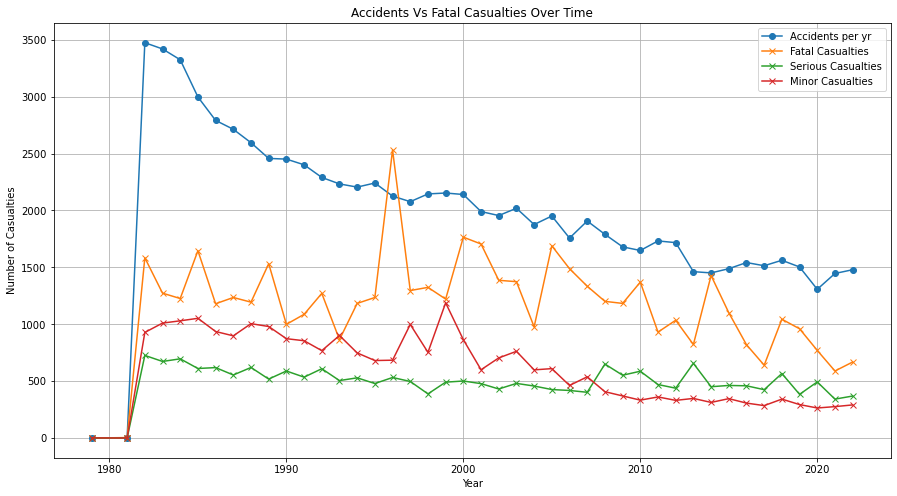

In [69]:
#plotting the data

plt.figure(figsize=(15,8))
plt.plot(Accidents_per_yr.index, Accidents_per_yr.values, label='Accidents per yr', marker='o')
plt.plot(Fatal_casualties.index, Fatal_casualties.values, label='Fatal Casualties', marker='x')
plt.plot(Serious_casualties.index, Serious_casualties.values, label='Serious Casualties', marker='x')
plt.plot(Minor_casualties.index, Minor_casualties.values, label='Minor Casualties', marker='x')
plt.title('Accidents Vs Fatal Casualties Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Casualties')
plt.legend()
plt.grid(True)
plt.show()

## Interpretation/Understanding
### Accidents across the years
* Before 1980, the number of flight been boarded were significantly small or recording of this data had not been initiated yet. After which a sharp increase is recorded indicating active recording of information.
* There seems to be a decline in the total number of casualties as the decades progress on indicating that techological improvements and risk mitigation measures seem to be improving across time.

### Casualties Rates across the years
*  The number of *Fatal* casualties across seems to correspond and distribute normally against the number of accidents that have occurred *except* between 1996 and 1997 where there seems to be a sharp increase in the number of fatalities which could indicate a certain make or model of airplane was introduced and didn't do so well. Further investigations will tell.
* From around 2007, the number of *minor* injuries seems to have stabalized into the 2020s.


# 
Counting the extend of damage to an aircraft vs purpose of the aircrft will help the organization decide on which aircrafts are likely to be severly damaged after accidents.

In [70]:
#List of purposes that do not meet business or private needs
Purposes_drop = ["Air Race show","Air Race/show","External Load","ASHO","PUBS","Public Aircraft","Public Aircraft - Federal","Public Aircraft - State","Public Aircraft - Local"]
#counting the number of 'Purpose.of.flight' and 'Aircraft.damage'
Purposes = df2.groupby(["Purpose.of.flight","Aircraft.damage"]).size().reset_index(name='Count')
#dropping the purpose first
Purposes_plot = Purposes[~Purposes["Purpose.of.flight"].isin(Purposes_drop)]
 #pivot the data 
Airplane_Damage = Purposes_plot.pivot(index="Purpose.of.flight",columns="Aircraft.damage",values = "Count")
# Changing how to plot order starting with the most extensive
Airplane_Damage = Airplane_Damage[["Destroyed","Substantial","Minor","Unknown"]]


No handles with labels found to put in legend.


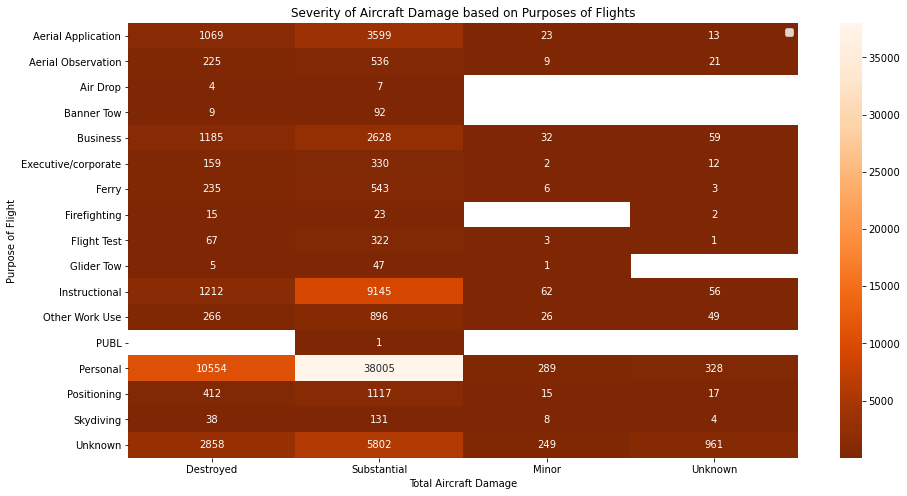

In [71]:
#Now, to plot the count for aircraft damage extent vs the purposes of flights
plt.figure(figsize=(15,8))
sns.heatmap(Airplane_Damage,annot=True,fmt =".0f",cmap='Oranges_r')
plt.title('Severity of Aircraft Damage based on Purposes of Flights')
plt.xlabel('Total Aircraft Damage')
plt.ylabel('Purpose of Flight')
plt.legend()
plt.grid(False)
plt.show()

In [81]:
df2["Purpose.of.flight"].value_counts()

Personal                     49176
Instructional                10475
Unknown                       9870
Aerial Application            4704
Business                      3904
Positioning                   1561
Other Work Use                1237
Aerial Observation             791
Ferry                          787
Public Aircraft                695
Executive/corporate            503
Flight Test                    393
Skydiving                      181
External Load                  122
Public Aircraft - Federal      103
Banner Tow                     101
Air Race show                   98
Public Aircraft - Local         73
Public Aircraft - State         62
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

## Interpretation/Understanding
### Severity of accidents across different purpose aircrafts
* Upon entering this business, it would not be advisable to purchase *personal aircrafts* as the data shows that they are barely recoverable when involved having the highest severity of damage. This could indicate that Personal aircrafts are not built to withstand accidents and would bring the company at a complete loss if accidents were to occur.
* On the flip side, aircrafts such as those used for *Flight tests*,*Executive/Corporate travel* and *Aerial observation* could be an ideal start point as the company ventures into the business seeing as they incure minor damages on accidents and can be repaired instead of being replaced.


### The **make** that are less prone to accidents.
Examining which aircraft makes are most frequently involved in accidents can provide insight into **operational risk exposure**.


In [72]:
#Making the makes of airplanes uniform by looping through to standardize the names
df2["Make"] = df2["Make"].apply(lambda x: x.lower())
df2["Make"].value_counts()

cessna                 26791
piper                  14683
beech                   5177
bell                    2662
boeing                  1362
                       ...  
prudhomme                  1
o'hara bob                 1
quest ii walsh ltd.        1
zielke                     1
royse ralph l              1
Name: Make, Length: 7529, dtype: int64

In [73]:
Aircraft_makes = df2["Make"].value_counts(sort=True).head(20)


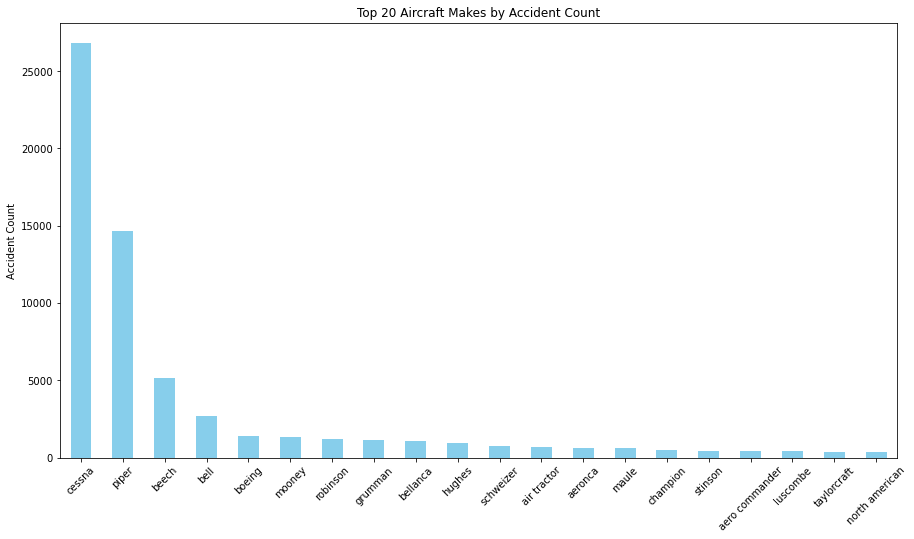

In [74]:
#Find the top 20 aircrafts you'd recommend the comapny to consider purchasing based on the number of accidents they've been involved in
plt.figure(figsize=(15,8))
Aircraft_makes.plot(kind='bar', color='skyblue')
plt.title('Top 20 Aircraft Makes by Accident Count')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()

## Interpretation/Understanding
### Aircraft Makes that are least likely to be involved in accidents
* Based on the data shown, it would not be advisable to purchase *Cessna" makes of airplanes are they have shown to have quite a number of accidents. This could be due to the make being the most produced making counterfit parts and substitues available in the market hence discrediting reliability of that authentic make.
* On the other hand, it would be recommendable to purchase either of the following makes as the company ventures into this new market as they have shown to be less prone to accidents; in this order.
    - Schweizer
    - Maule
    - stinson
    - north american
This could also mean that they are not readily made and would cost more to procure.

This data can also be misleading seeing as the number of accidents an aircraft faces is proportionate to the number that are made.

Que 2. How often do commercial and private aircrafts experience accidents and what seem to be the typical causes of these accidents? 
- Which factors seem to be influencing accident rates? Is it scheduling vs unscheduling of flights? Weather conditions, no.of engines?
- In which phases of flight are more accident-prone?

In [75]:
#Looking at number of accidents that take place during each weather category
df2["Weather.Condition"].value_counts()
#Changing all to uppercase 
df2["Weather.Condition"] = df2["Weather.Condition"].apply(lambda x: x.upper())

In [76]:
df2["Weather.Condition"].value_counts()

VMC    75185
IMC     5723
UNK     4102
Name: Weather.Condition, dtype: int64

In [77]:
df2["Schedule"].value_counts()

UNK     78966
NSCH     4028
SCHD     2016
Name: Schedule, dtype: int64

### plotting the severity of the aircraft damage by weather 
This is to try and understand if the the weather conditions affect the severity of damage to the aircraft when an accident occurs.


In [78]:

Weather = df2.groupby(["Weather.Condition","Aircraft.damage"]).size().reset_index(name='Count')
Weather_plot = Weather[~Weather["Weather.Condition"].isin(Weather)]
 #pivot the data 
Airplane_Damage = Weather_plot.pivot(index="Weather.Condition",columns="Aircraft.damage",values = "Count")
Airplane_Damage = Airplane_Damage[["Destroyed","Substantial","Minor","Unknown"]]


No handles with labels found to put in legend.


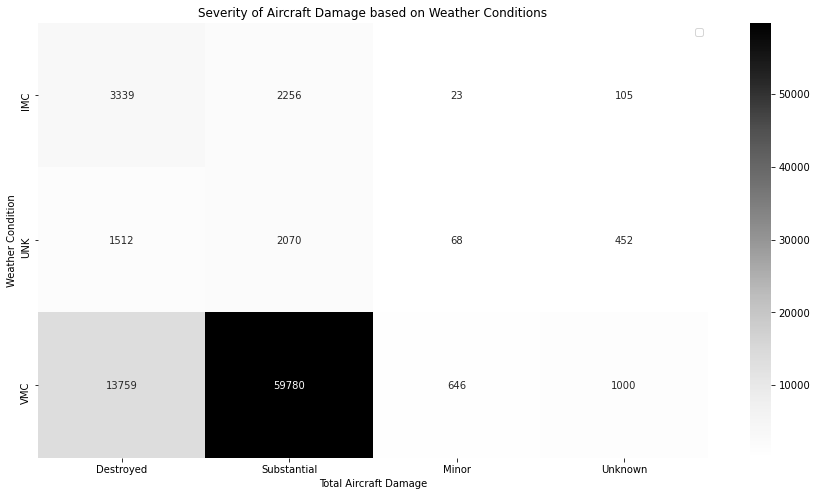

In [79]:
plt.figure(figsize=(15,8))
sns.heatmap(Airplane_Damage,annot=True,fmt =".0f",cmap='Greys')
plt.title('Severity of Aircraft Damage based on Weather Conditions')
plt.xlabel('Total Aircraft Damage')
plt.ylabel('Weather Condition')
plt.legend()
plt.grid(False)
plt.show()

## Interpretation/Understanding
### Aircraft are less likely to be completely destroyed if the accidents occur in weather which pilots have sufficient visibility.
* Based on the data shown, in the event that the weather conditions are adverse and pilots require instrumental aids to aid in visibility, then should an accident occur, chances of repairing the aircraft would be minimal seeing as it would be completely destroyed.

### What of the number of engines in poor weather conditions? Would this minimize the occurency of an accident?

No handles with labels found to put in legend.


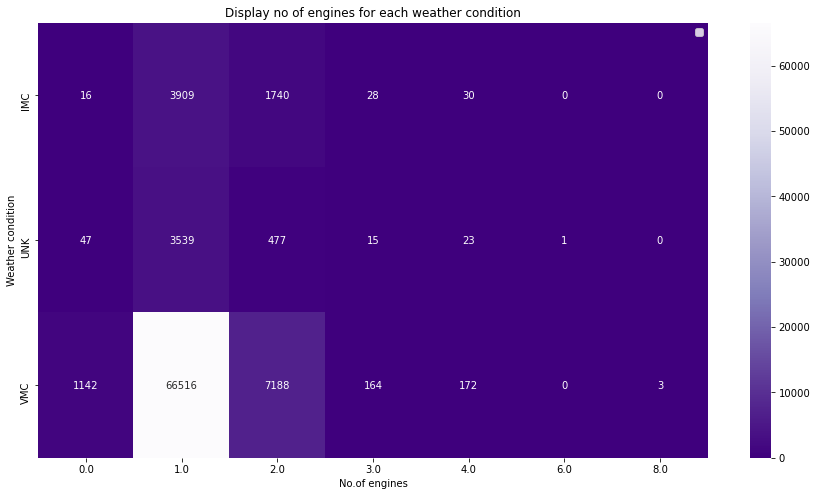

In [80]:
#Let's find out
#pivot the data 
Engines_plot= df2.pivot_table(index="Weather.Condition",columns="Number.of.Engines",aggfunc='size',fill_value=0)
plt.figure(figsize=(15,8))
sns.heatmap(Engines_plot,annot=True,fmt =".0f",cmap='Purples_r')
plt.title('Display no of engines for each weather condition')
plt.xlabel('No.of engines')
plt.ylabel('Weather condition')
plt.legend()
plt.grid(False)
plt.show()

## Interpretation/Understanding
### Number of engines impact on the accident occurency with weather factored in.
* We can see that the more the number of engines, the less the number of accidents across both unfavourable and favourable weather conditions.
We can see that the airplanes with 1 engine have the highest occuring accidents inspite of there being favourable weather.

** This is to conclude that the number of engines more likely affects the rate of accidents as compared to weather.

## 4 Conclusion

The analysis of historical airline accident data reveals several important insights that the stakeholders ought to consider before venturing into the business:

1. **Significant Decline in Accidents Over Time**  
   The frequency of accidents and the severity of the casualties has considerably been reducing since the 1970s. This is to show that there have been and continue to be major technological advancements and better risk mitigation measures put in place.The aviation industry continues to show promise and more risk mitiagtin measures will continue to be put in place.

2. **Impact of accidents across differently purposed aircrafts**
The number of accidents that plague personal aircrafts seem to be alarmingly high with most of those accidents rendering the aircrafts lost on occurence. Additionally, it appears that personal-use aircraft are becoming increasingly common on the market, which may suggest that their manufacturing processes are subject to comparatively less regulation and safety inspection.


3. **Aircraft Make Trends Reflect Exposure/Occurrence, Not Necessarily Risk**  

The data suggests that purchasing Cessna aircraft may not be advisable due to their higher accident rates, potentially linked to mass production and the circulation of counterfeit parts that undermine reliability. Conversely, makes such as Schweizer, Maule, Stinson, and North American appear to be safer options, though their limited availability may result in higher procurement costs.


4. **Factors affecting aircraft accident rates**  
   The findings indicate that aircraft fitted with multiple engines demonstrate a lower frequency of accidents across both favorable and adverse weather conditions. This trend suggests that engine configuration is a more critical determinant of accident occurrence than prevailing weather conditions, highlighting the role of engine redundancy in enhancing overall flight safety.

